In [35]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import json
import math
from fnvhash import fnv1a_32

In [36]:
f=open('ast_result.txt','r')
raw_data = json.loads(f.read())
f.close()
hashed_data=[]
'''
for i in range(1,21):
    hashed_element = []
    for j in range(len(raw_data[str(i)])):
        hashed_element.append([fnv1a_32(bytes(raw_data[str(i)][j][0], encoding="ascii")),fnv1a_32(bytes(raw_data[str(i)][j][1], encoding="ascii"))])
    hashed_data.append(hashed_element)
'''
index=[]
for i in range(1,21):
    hashed_element = []
    for j in range(len(raw_data[str(i)])):
        hashed_element.append((fnv1a_32(bytes(raw_data[str(i)][j][0], encoding="ascii"))+fnv1a_32(bytes(raw_data[str(i)][j][1], encoding="ascii")))/5000000000)
#    if len(hashed_element)==752:
    hashed_data.append(hashed_element)
    index.append(i)
min_length=min([len(i) for i in hashed_data])
hashed_data=[i[:min_length] for i in hashed_data]
print(len(hashed_data))

20


/Users/fengjunyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


20


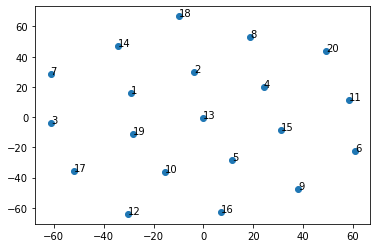

In [37]:
'''t-SNE'''
m = manifold.TSNE(learning_rate=50)
tsne_result = m.fit_transform(np.array(hashed_data))
print(len(tsne_result))
plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1])
for i in range(len(tsne_result)):
    plt.text(tsne_result[i,0],tsne_result[i,1],i+1)



[[1, array([-0.67219084,  2.74246536])], [2, array([-1.04646506, -0.4637497 ])], [3, array([-0.77499556,  2.97747668])], [4, array([-1.72101813, -0.01098949])], [5, array([-1.18478275,  1.2434135 ])], [6, array([-1.27006029, -0.63568635])], [7, array([ 0.08980307, -1.61782241])], [8, array([-0.33588445, -0.84235997])], [9, array([ 0.15691102, -1.72527241])], [10, array([-1.4100679 , -1.30076524])], [11, array([ 0.35762941, -0.67923658])], [12, array([3.17793829, 0.21664602])], [13, array([-0.01518903, -0.4817856 ])], [14, array([3.38570336, 0.73693904])], [15, array([3.1260144 , 0.26743983])], [16, array([-1.13160181,  0.44743831])], [17, array([ 0.42915394, -0.38123924])], [18, array([-1.13553413,  0.3971082 ])], [19, array([ 0.03953103, -1.04736359])], [20, array([-0.06489457,  0.15734366])]]


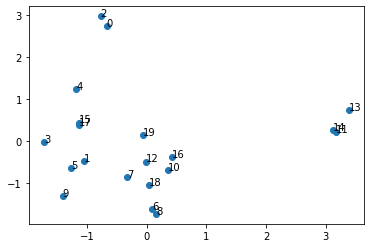

In [38]:
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(hashed_data)
new_result=[]
for i in range(len(pca_result)):
    new_result.append([index[i],pca_result[i]])
print(new_result)
plt.scatter(x=pca_result[:,0],y=pca_result[:,1])
d=0
for i in range(len(pca_result)):
    plt.text(pca_result[i,0],pca_result[i,1],i)
    d+=1

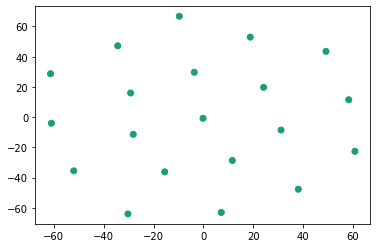

In [39]:
clusterer = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_pred = clusterer.fit_predict(tsne_result)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_pred, cmap='Dark2')

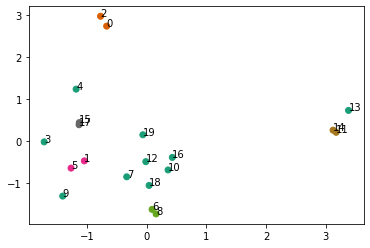

In [44]:
clusterer2 = DBSCAN(eps=0.3, min_samples=2, metric='euclidean')
z_pred = clusterer2.fit_predict(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=z_pred, cmap='Dark2')
d=0
for i in range(len(pca_result)):
    plt.text(pca_result[i,0],pca_result[i,1],i)
    d+=1